In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
job_titles=['Data Analyst', 'Data Engineer', 'Data Scientist']
# Only get data analyst jobs in the India
df_ind = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_ind = df_ind.dropna(subset=['salary_year_avg'])

df_ind['salary_year_avg'].sample(10)

423836    157500.0
773374    147500.0
565613     87705.0
344537    147500.0
380987     79200.0
290129     93600.0
301632    157500.0
45683      79200.0
732554     79200.0
551479    111175.0
Name: salary_year_avg, dtype: float64

In [17]:
job_list= [df_ind[df_ind['job_title_short'] == job_titles]['salary_year_avg'] for job_titles in job_titles]

<Axes: >

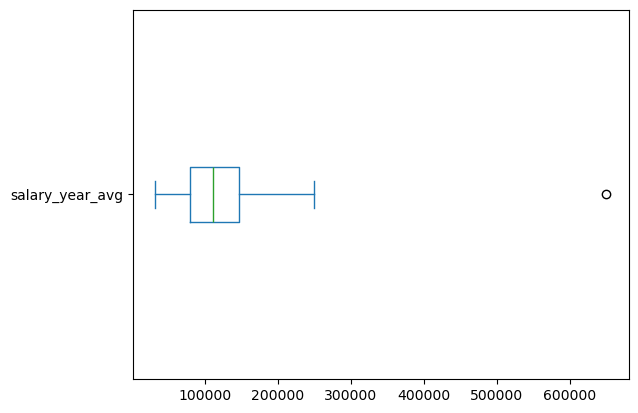

In [21]:
df_ind['salary_year_avg'].plot(kind='box', vert=False)

(0.0, 300000.0)

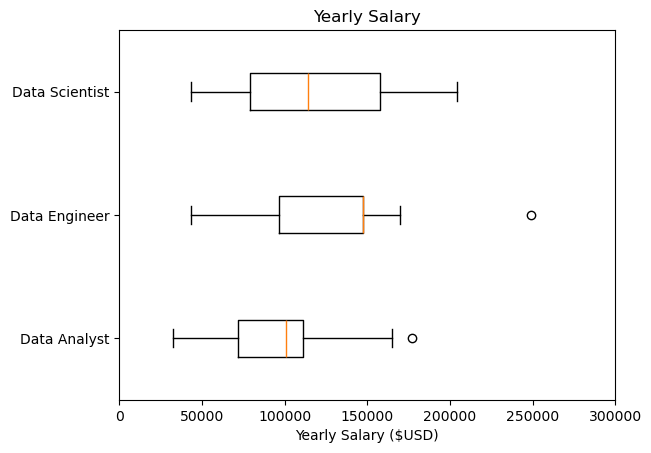

In [28]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlabel('Yearly Salary ($USD)')
plt.title('Yearly Salary')
ax = plt.gca()
plt.xlim(0,300000)